## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## LOAD DATASET

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\GITDEMO\AI\ML_I\2_ Data Cleaning & Missing Value Handling\houseprice.csv")
df.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [3]:
df.shape

(398, 37)

## identify missing values

In [4]:
df.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        1
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      24
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

GarageYrBlt      24
MasVnrArea        1
LotArea           0
MSSubClass        0
Id                0
OverallCond       0
OverallQual       0
YearRemodAdd      0
YearBuilt         0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
BsmtFinSF1        0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
1stFlrSF          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

## Visualize missing data

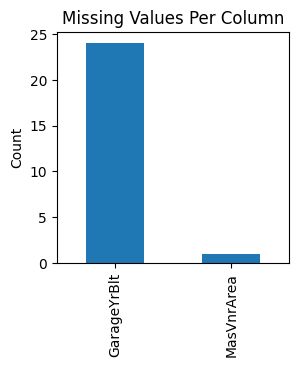

In [6]:
missing[missing > 0].plot(kind="bar", figsize=(3,3))
plt.title("Missing Values Per Column")
plt.ylabel("Count")
plt.show()

##  imputation for  numerical columns & categorical columns

In [7]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns


In [8]:
# median 
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7676\1494448929.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7676\1494448929.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
# mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


## Remove columns with extremely high missing values

In [10]:
df.drop(columns=["GarageYrBlt"], inplace=True)


## Validate dataset after cleaning.

In [11]:
df.isnull().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [12]:
df.shape

(398, 36)

## Compare before vs after dataset size and quality.

In [13]:
df.shape[1]  
# before cleaning data size is 398 , 37    & after cleaning the dataset is 398 , 36

36